In [12]:
import pandas as pd

# Load the dataset
file_path = './datasets/insurance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Data preprocessing and model bulding

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
# data['sex'] = data['sex'].map({'male': 1, 'female': 0})

In [16]:
# Encode categorical columns
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

le_smoker = LabelEncoder()
data['smoker'] = le_smoker.fit_transform(data['smoker'])

le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

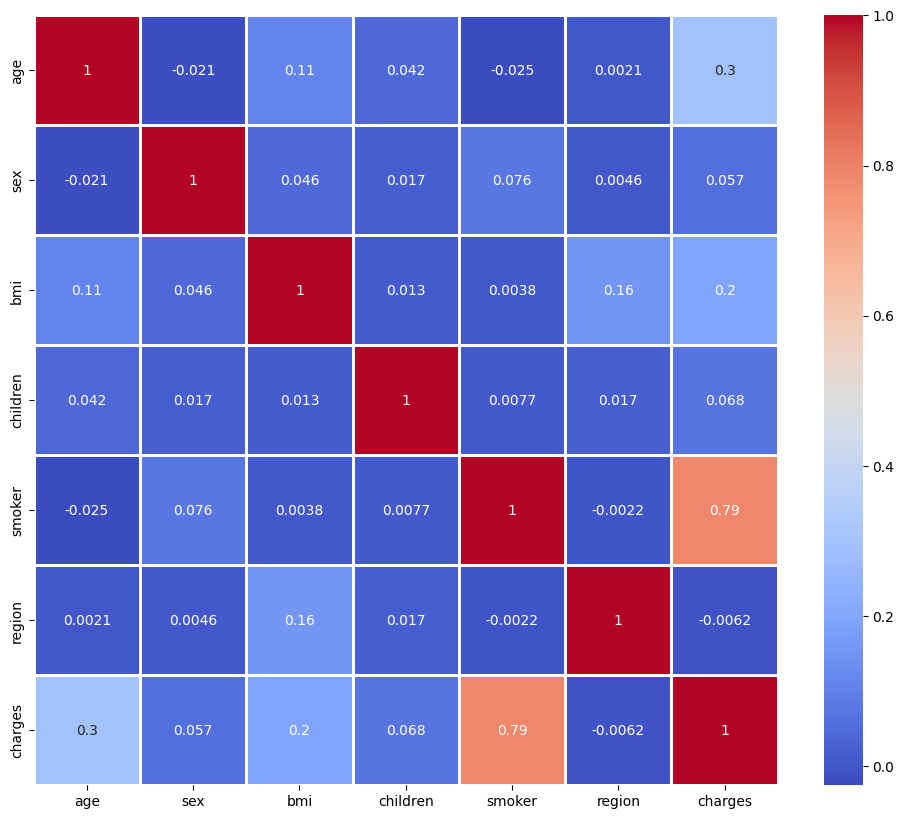

In [36]:
# plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()


In [17]:
data['region'].unique()

array([3, 2, 1, 0])

In [30]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [19]:
# Splitting the dataset into features and target
X = data.drop('smoker', axis=1)
y = data['smoker']

In [25]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [21]:
X.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [22]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random state is for reproducibility

In [26]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: y train normalization

# Fit the logistic regression model

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0])

In [31]:
y_test

764     0
887     0
890     1
1293    0
259     1
       ..
109     1
575     0
535     0
543     1
846     0
Name: smoker, Length: 268, dtype: int64

In [32]:
accuracy_score(y_pred, y_test)

0.9589552238805971

In [33]:
confusion_matrix(y_pred, y_test)

array([[208,   5],
       [  6,  49]])

In [35]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.91      0.89      0.90        55

    accuracy                           0.96       268
   macro avg       0.94      0.93      0.94       268
weighted avg       0.96      0.96      0.96       268



In [42]:
X_test.head()

,age,sex,bmi,children,region,charges
764,45,0,25.175,2,0,9095.06825
887,36,0,30.020,0,1,5272.17580
890,64,0,26.885,0,1,29330.98315
1293,46,1,25.745,3,1,9301.89355
259,19,1,31.920,0,1,33750.29180


In [46]:
# predict only on a single row
log_reg.predict(scaler.transform([[45, 0, 50, 2, 0, 100000]]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])